<a href="https://colab.research.google.com/github/LilTerryZ/Research-project/blob/main/research.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# pip install pycaret
import numpy as np
import pandas as pd
from pycaret.utils import enable_colab 
from pycaret.datasets import get_data
enable_colab()

Colab mode enabled.


In [ ]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', delimiter=';')

data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))


Data for Modeling: (1439, 12)
Unseen Data For Predictions: (160, 12)


In [ ]:
from pycaret.regression import *
exp_reg101 = setup(data = data, target = 'alcohol', session_id=123) 

,Description,Value
0,session_id,123
1,Target,alcohol
2,Original Data,"(1439, 12)"
3,Missing Values,False
4,Numeric Features,10
5,Categorical Features,1
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(1007, 16)"


In [ ]:
best = compare_models(exclude = ['ransac'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.3599,0.2786,0.5236,0.7496,0.0449,0.0342,0.109
rf,Random Forest Regressor,0.3881,0.3085,0.5523,0.7227,0.0471,0.0368,0.753
gbr,Gradient Boosting Regressor,0.4023,0.3071,0.5504,0.7226,0.0471,0.0383,0.161
et,Extra Trees Regressor,0.3697,0.3120,0.5563,0.7210,0.0473,0.0350,0.540
lr,Linear Regression,0.4652,0.3677,0.6036,0.6665,0.0523,0.0445,0.298
lar,Least Angle Regression,0.4762,0.3952,0.6235,0.6463,0.0541,0.0457,0.016
ada,AdaBoost Regressor,0.5639,0.4922,0.7005,0.5600,0.0604,0.0545,0.131
dt,Decision Tree Regressor,0.4804,0.5606,0.7441,0.4928,0.0637,0.0455,0.021
br,Bayesian Ridge,0.6640,0.7347,0.8545,0.3542,0.0725,0.0628,0.014
ridge,Ridge Regression,0.6643,0.7359,0.8552,0.3533,0.0726,0.0628,0.014


In [ ]:
ada = create_model('ada')
print(ada)
tuned_ada = tune_model(ada)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.6094,0.5356,0.7319,0.5585,0.0631,0.0589
1,0.5224,0.4110,0.6411,0.6404,0.0568,0.0516
2,0.5357,0.4436,0.6660,0.6742,0.0570,0.0512
3,0.5493,0.4777,0.6911,0.4544,0.0597,0.0532
4,0.5866,0.4920,0.7014,0.5424,0.0614,0.0575
5,0.5523,0.5706,0.7554,0.6418,0.0623,0.0515
6,0.5610,0.4771,0.6907,0.5625,0.0603,0.0548
7,0.5298,0.4080,0.6388,0.6012,0.0552,0.0512
8,0.5429,0.4453,0.6673,0.5467,0.0582,0.0526
9,0.5866,0.5260,0.7253,0.5143,0.0620,0.0556


In [ ]:
lr = create_model('lr')
print(lr)
tuned_lr = tune_model(lr)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.4877,0.3931,0.6269,0.6761,0.0541,0.0471
1,0.4456,0.3418,0.5846,0.7009,0.0517,0.0438
2,0.4417,0.3496,0.5913,0.7432,0.0509,0.0421
3,0.4953,0.4405,0.6637,0.4968,0.0572,0.0477
4,0.4042,0.2536,0.5036,0.7641,0.0446,0.0397
5,0.4528,0.3031,0.5505,0.8098,0.0476,0.0425
6,0.5058,0.4423,0.6651,0.5944,0.0573,0.0477
7,0.4070,0.2774,0.5267,0.7289,0.0451,0.0386
8,0.5059,0.4273,0.6537,0.5651,0.0571,0.0482
9,0.5059,0.4487,0.6699,0.5856,0.0579,0.0478


In [ ]:
ridge = create_model('ridge')
print(ridge)
tuned_ridge = tune_model(ridge)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.7528,0.8584,0.9265,0.2926,0.0786,0.0716
1,0.6969,0.7539,0.8683,0.3403,0.0752,0.0671
2,0.6507,0.7585,0.8709,0.4430,0.0733,0.0609
3,0.6214,0.5997,0.7744,0.3150,0.0667,0.0599
4,0.6673,0.6863,0.8285,0.3616,0.0716,0.0646
5,0.7103,1.0217,1.0108,0.3586,0.0814,0.0633
6,0.6828,0.7726,0.8790,0.2915,0.0747,0.0649
7,0.6239,0.5970,0.7726,0.4165,0.0660,0.0594
8,0.6824,0.7616,0.8727,0.2248,0.0750,0.0648
9,0.6045,0.6649,0.8154,0.3860,0.0692,0.0567


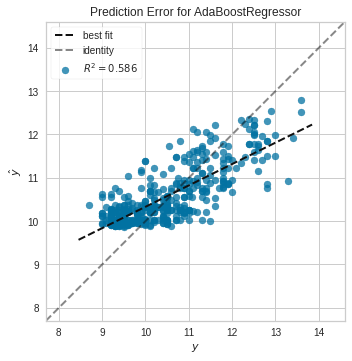

In [ ]:
print(tuned_ada)
plot_model(tuned_ada, plot = 'error')

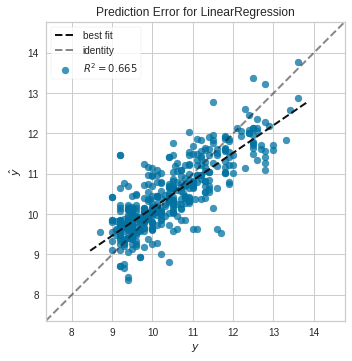

In [ ]:
print(tuned_lr)
plot_model(tuned_lr, plot = 'error')

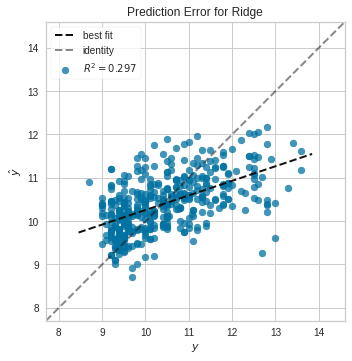

In [ ]:
print(tuned_ridge)
plot_model(tuned_ridge, plot = 'error')

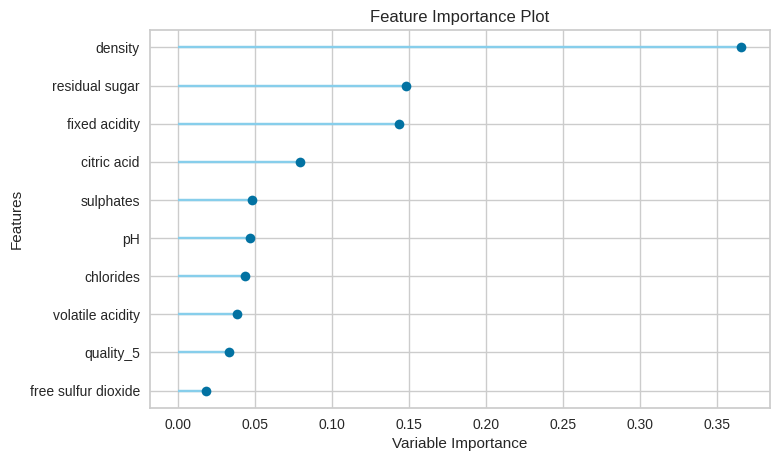

In [ ]:
plot_model(tuned_ada, plot='feature')

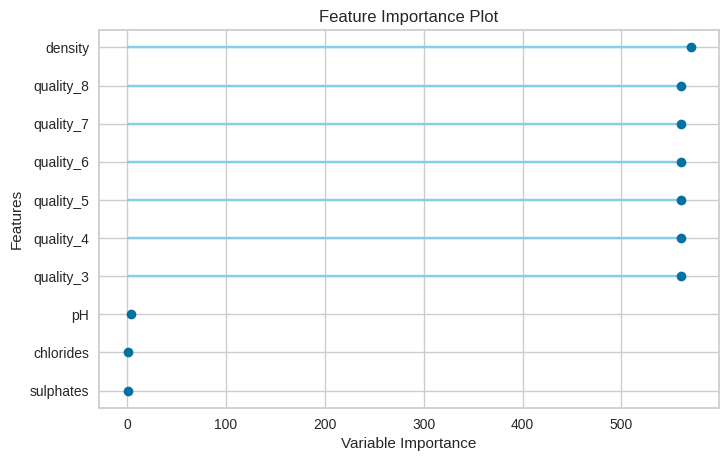

In [ ]:
plot_model(tuned_lr, plot='feature')

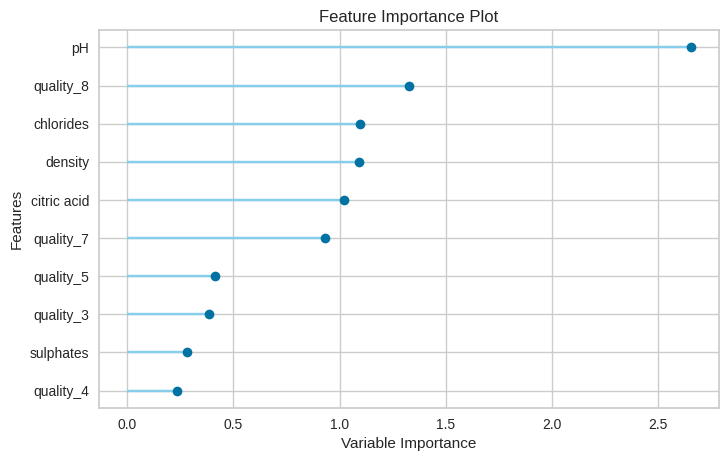

In [ ]:
plot_model(tuned_ridge, plot='feature')

In [ ]:
# evaluate_model(tuned_ada)

In [ ]:
predict_model(tuned_ada);
predict_model(tuned_lr);
predict_model(tuned_ridge);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,AdaBoost Regressor,0.5509,0.4459,0.6678,0.5862,0.058,0.0533


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,0.4594,0.3613,0.6011,0.6648,0.0521,0.044


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Ridge Regression,0.6688,0.7576,0.8704,0.2971,0.0742,0.0632


In [ ]:
final_ada = finalize_model(tuned_ada)
print(final_ada)
predict_model(final_ada);

final_lr = finalize_model(tuned_lr)
print(final_lr)
predict_model(final_lr);

final_ridge = finalize_model(tuned_ridge)
print(final_ridge)
predict_model(final_ridge);

AdaBoostRegressor(base_estimator=None, learning_rate=0.4, loss='exponential',
                  n_estimators=80, random_state=123)


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,AdaBoost Regressor,0.5345,0.3965,0.6297,0.6321,0.0549,0.0519


LinearRegression(copy_X=True, fit_intercept=False, n_jobs=-1, normalize=True)


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,0.4509,0.348,0.59,0.6771,0.0511,0.0432


Ridge(alpha=2.81, copy_X=True, fit_intercept=False, max_iter=None,
      normalize=True, random_state=123, solver='auto', tol=0.001)


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Ridge Regression,0.663,0.738,0.8591,0.3152,0.0733,0.0628


In [ ]:
unseen_predictions = predict_model(final_ada, data=data_unseen)
unseen_predictions.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Label
0,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,9.838731
1,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,10.658333
2,7.8,0.610,0.29,1.6,0.114,9.0,29.0,0.9974,3.26,1.56,9.1,5,9.899804
3,8.1,0.560,0.28,1.7,0.368,16.0,56.0,0.9968,3.11,1.28,9.3,5,9.854938
4,8.3,0.655,0.12,2.3,0.083,15.0,113.0,0.9966,3.17,0.66,9.8,5,10.165915


In [ ]:
unseen_predictions = predict_model(final_lr, data=data_unseen)
unseen_predictions.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Label
0,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,9.524414
1,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,11.121643
2,7.8,0.610,0.29,1.6,0.114,9.0,29.0,0.9974,3.26,1.56,9.1,5,10.225769
3,8.1,0.560,0.28,1.7,0.368,16.0,56.0,0.9968,3.11,1.28,9.3,5,9.545715
4,8.3,0.655,0.12,2.3,0.083,15.0,113.0,0.9966,3.17,0.66,9.8,5,9.633728


In [ ]:
unseen_predictions = predict_model(final_ridge, data=data_unseen)
unseen_predictions.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Label
0,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,10.172060
1,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,11.225004
2,7.8,0.610,0.29,1.6,0.114,9.0,29.0,0.9974,3.26,1.56,9.1,5,10.117857
3,8.1,0.560,0.28,1.7,0.368,16.0,56.0,0.9968,3.11,1.28,9.3,5,9.189151
4,8.3,0.655,0.12,2.3,0.083,15.0,113.0,0.9966,3.17,0.66,9.8,5,9.236106


In [ ]:
save_model(final_ada,'Final AdaBoost Model')
save_model(final_lr,'Final Linear Regression Model')
save_model(final_ridge,'Final Ridge Regression Model')

Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='alcohol',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy...
                 ('dummy', Dummify(target='alcohol')),
                 ('fix_perfect', Remove_100(target='alcohol')),
                 ('clean_names', Clean_Colum_Names()),
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                 ('dfs', 'passthrough'), ('pca', 'passthr